# PCA Task
### Let us start the PCA task on the BATAdal dataset.
#### Step 0: Reading the both the data sets (BATADAL_dataset03, 04) using read_csv and explore the column names and data
#### Step 1: Normalize the training dataset
#### Step 2: Apply PCA analysis on training data
#### Step 3: Tune the threshold  
#### Step 4: Apply the same normalization and PCA transform on the test data



#### Step 0: Reading the both the data sets (BATADAL_dataset03, 04) using read_csv and explore the column names and data

In [8]:
#Step 0: Reading the both the data sets (BATADAL_dataset03, 04) using read_csv and explore the column names and data¶
#importing pandas for reading the csv file
import pandas as pd

dataset03 = pd.read_csv("BATADAL_dataset03.csv")
dataset04 = pd.read_csv("BATADAL_dataset04.csv")

# Observing the dataset columns and values
print ("BATADAL_dataset03.csv")
print(dataset03.head())
print (dataset03.columns)
print ("BATADAL_dataset04.csv")
print(dataset04.head())
print (dataset04.columns)

BATADAL_dataset03.csv
      DATETIME      L_T1      L_T2      L_T3      L_T4      L_T5      L_T6  \
0  06/01/14 00  0.509730  2.049003  3.191145  2.792634  2.656091  5.316831   
1  06/01/14 01  0.412580  2.009072  3.642565  2.831673  3.126387  5.494855   
2  06/01/14 02  0.320112  1.986093  4.140192  3.256733  3.574601  5.500000   
3  06/01/14 03  0.332879  2.009203  4.673478  3.744497  3.952379  5.500000   
4  06/01/14 04  0.483496  2.089049  5.237937  4.409456  3.504676  5.500000   

       L_T7      F_PU1  S_PU1    ...        P_J256     P_J289     P_J415  \
0  1.562321  98.998444      1    ...     87.605774  26.495605  84.206619   
1  1.852043  99.095901      1    ...     89.448341  26.487326  85.900085   
2  2.246126  98.420959      1    ...     91.056114  26.487364  86.582474   
3  3.203573  97.575172      1    ...     92.594353  26.575815  88.020546   
4  4.439714  97.351059      1    ...     94.473099  26.723457  90.422462   

      P_J302     P_J306     P_J307     P_J317      P

## Pre-Processing - Dataset03
#### Dropping ATT_FLAG and DATETIME columns in dataset03 as they are not important for the PCA

In [9]:
dataset03= dataset03.drop("ATT_FLAG",axis=1,inplace=False) 
dataset03.head()
dataset03 = dataset03.loc[:,dataset03.columns!='DATETIME'] 
dataset03.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J300,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422
0,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,26.426495,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471
1,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,26.422962,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256
2,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,26.427771,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538
3,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,26.519985,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952
4,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,26.671642,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263


#### Training data is taken from BATADAL_dataset03 at first and PCA will be applied on this.

#### Step 1: Normalize the training dataset

##### Let us first create the normalized training data by applying StandardScaler

In [10]:
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing
import numpy as np
X_scaled = preprocessing.scale(dataset03)
print("X_scaled")
print(X_scaled)
#Scaled data has zero mean and unit variance:
print("Mean")
print(X_scaled.mean(axis=0))
print("Standard Deviation")
print(X_scaled.std(axis=0))


X_scaled
[[-1.80166786 -0.84216105 -1.4897346  ... -0.14960353 -1.03212449
  -0.36335486]
 [-1.88243244 -0.8693521  -0.82434137 ... -0.13962538 -1.03997205
  -0.37585097]
 [-1.95930569 -0.88499958 -0.09084088 ...  0.84640594 -1.03990535
  -0.37574476]
 ...
 [ 0.36394528  0.45105891 -1.58995051 ... -0.2674142  -0.58470987
   0.34908874]
 [ 0.21173951  0.41325741 -0.97116869 ... -0.20251108 -0.60133195
   0.32262046]
 [ 0.05827056  0.36958123 -0.32060645 ...  0.12189842 -0.60166048
   0.32209734]]
Mean
[-2.41686720e-16 -1.00162114e-16 -2.07268666e-16 -1.89780847e-16
 -1.33110177e-16  3.10462001e-15 -2.83860241e-17  3.77128606e-16
  0.00000000e+00 -2.75141677e-16  4.11597350e-17  0.00000000e+00
  0.00000000e+00 -7.02554098e-17 -1.63726532e-17  0.00000000e+00
  0.00000000e+00 -3.04135973e-17 -3.40632290e-17  1.13138582e-16
 -8.47525578e-17 -7.13198857e-17 -6.58454381e-17  0.00000000e+00
  0.00000000e+00 -3.11435236e-16 -3.71045887e-17 -4.46066094e-18
  1.41930121e-17  8.39415285e-17 -5.636

#### Step 2: Apply PCA analysis on training data - dataset03



In [17]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
fit = pca.fit(X_scaled)
transform = pca.transform(X_scaled)

print(pca.fit(X_scaled))
print(pca.transform(X_scaled))
print("--------------explained_variance_ratio_--------------")
print(pca.explained_variance_ratio_) 
print("-----------------singular_values_--------------------")
print(pca.singular_values_)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
[[-2.24905257 -2.51721473 -1.61306891 ... -0.01326591 -2.24174214
   0.21515078]
 [-2.31116088 -2.56834897 -1.59614586 ... -0.00676206 -1.37169345
   0.07073133]
 [-2.15564395 -2.55573008 -1.52915128 ... -0.03547918 -0.65216308
   0.43389517]
 ...
 [-1.08896885 -2.33739456 -1.24527305 ... -0.15589374 -2.71333915
   0.25096319]
 [-1.14882797 -2.36946046 -1.26217592 ... -0.12374611 -2.41964211
   0.33120898]
 [-1.22150861 -2.51090192 -1.16303742 ... -0.07974715 -1.88278262
   0.24516844]]
--------------explained_variance_ratio_--------------
[0.21494218 0.13380098 0.12803414 0.0997661  0.07213515 0.06760294
 0.05553068 0.05537946 0.04252699 0.03248401]
-----------------singular_values_--------------------
[260.36878125 205.42710216 200.95137245 177.3861003  150.83480477
 146.01950594 132.34105095 132.16073091 115.81382302 101.21920392]


In [19]:
# function of deciding the number of eigenvalue to use for PCA
def percentage2n(eigVals,percentage):  
    sortArray=np.sort(eigVals)   
    sortArray=sortArray[-1::-1]   
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num,sortArray

In [23]:
# find the number of eigenvalue
covMat=np.cov(transform,rowvar=0)
eigVals,eigVects=np.linalg.eig(np.mat(covMat)) 
num,sortArray = percentage2n(eigVals,0.99)
print ('Number of principle component:',num )   # 6 principle component
#print 'array of eigenvalue:',sortArray        # variance

Number of principle component: 10


In [24]:
# define the function of PCA. return the reconstructed data and principle eigenvectors.
def pca(newData,n):   
    covMat=np.cov(newData,rowvar=0)    #calculate covariance matrix  
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))  
    eigValIndice=np.argsort(eigVals)             
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]    
    n_eigVect=eigVects[:,n_eigValIndice]         
    lowDDataMat=newData*n_eigVect                
    reconMat=(lowDDataMat*n_eigVect.T)  #reconstructed data 
    return n_eigVect,reconMat

In [26]:
P,X_train_rec = pca(transform,num)

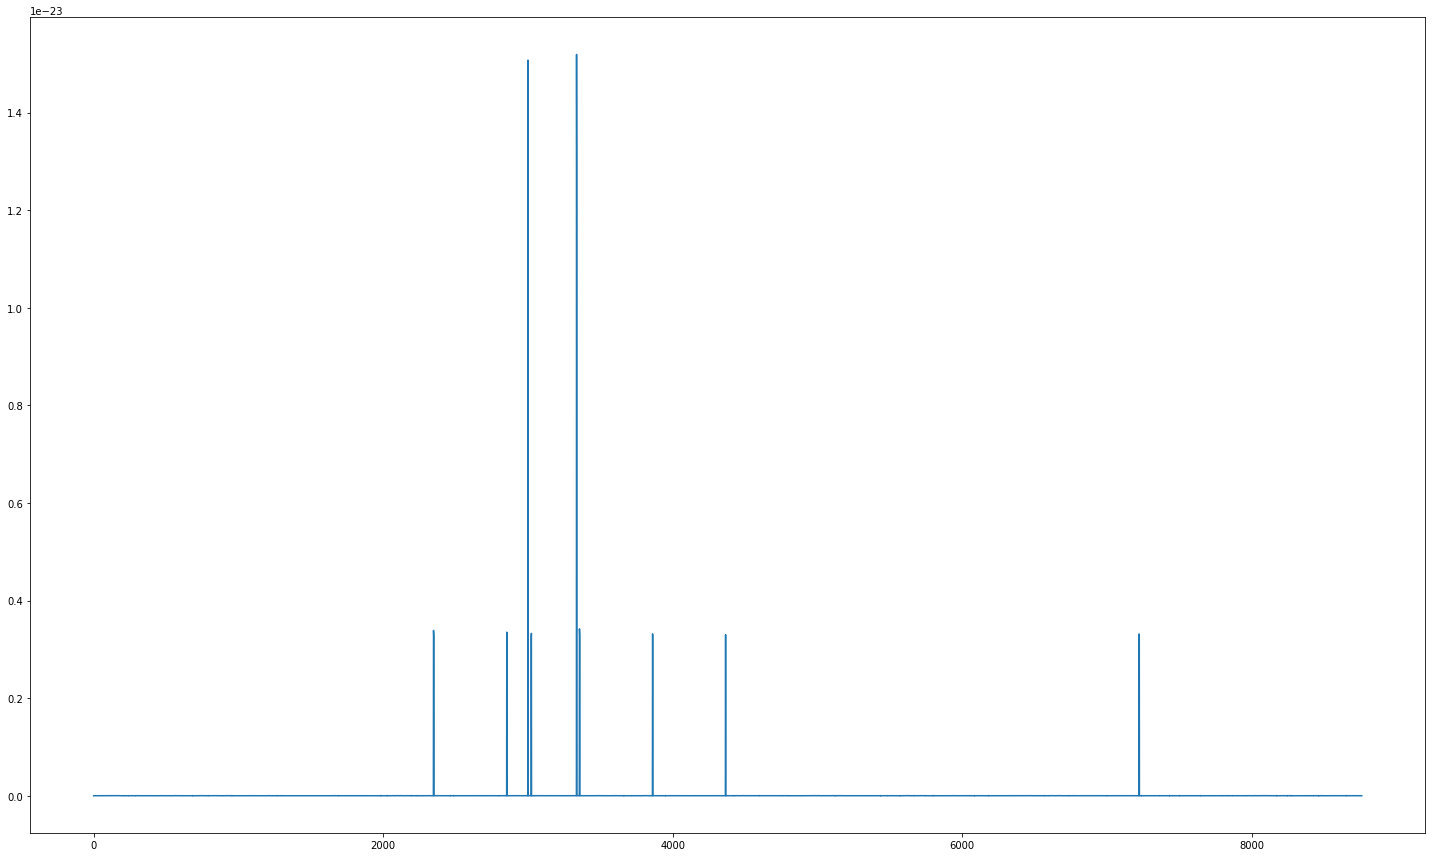

<Figure size 1800x720 with 0 Axes>

In [29]:
#Compute and plot the residual
import matplotlib.pyplot as plt
residual_pca1 = transform - X_train_rec
residual_pca2 = np.square(residual_pca1)
residual_pca = residual_pca2.sum(axis=1) 

figure, ax = plt.subplots(figsize=[25,15])
plt.figure(figsize=[25,10])
ax.plot(residual_pca)

## Pre-processing for dataset04
#### Step 2: Apply PCA analysis on training data - dataset04

In [16]:
dataset04 = dataset04.loc[:dataset04['ATT_FLAG'] != '1']
X_scaled04 = preprocessing.scale(dataset04)
print("X_scaled04")
print(X_scaled04)
#Scaled data has zero mean and unit variance:
print("Mean")
print(X_scaled04.mean(axis=0))
print("Standard Deviation")
print(X_scaled04.std(axis=0))
fit = pca.fit(X_scaled04)
pca.transform(X_scaled04)

KeyError: 'ATT_FLAG'